# 簡單線性回歸
- 範例1. 使用自動微分估算簡單線性迴歸的參數(w、b)
- $ y = wx + b$

## 載入套件

In [1]:
import numpy as np 
import tensorflow as tf 

## 定義損失函數

In [2]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

## 定義預測值函數

In [3]:
def predict(X):
    return w * X + b    

## 定義訓練函數

In [4]:
def train(X, y, epochs=40, lr=0.0001):
    current_loss=0                                # 損失函數值
    for epoch in range(epochs):                   # 執行訓練週期
        with tf.GradientTape() as t:              # 自動微分
            t.watch(tf.constant(X))               # 宣告 TensorFlow 常數參與自動微分
            current_loss = loss(y, predict(X))    # 計算損失函數值
        
        dw, db = t.gradient(current_loss, [w, b]) # 取得 w, b 個別的梯度

        # 更新權重：新權重 = 原權重 — 學習率(learning_rate) * 梯度(gradient)
        w.assign_sub(lr * dw) # w -= lr * dw
        b.assign_sub(lr * db) # b -= lr * db

        # 顯示每一訓練週期的損失函數
        print(f'| Epoch : {epoch} | Loss: {current_loss.numpy()} |') 

## 產生隨機資料

In [5]:
# 產生線性隨機資料100筆，介於 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# 資料加一點雜訊(noise)
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

In [6]:
X

array([ 3.436693  ,  1.20653116, -0.53452609, -6.26853761, -4.53928843,
       -4.07342175,  8.06251097, -3.69992583,  5.27957152,  3.8364917 ,
        0.33039418, 10.72913465, 15.4127922 , 10.65619486,  0.68220571,
       10.94055203,  1.662496  , 11.95558881, 18.03419323,  4.14260337,
        1.03354939, 11.29380318,  5.2734103 , 13.60701093, 18.32395292,
        5.50051889, 12.45069497,  6.58777673,  5.24877968, 18.09377988,
       16.35432122, 10.47771976, 17.16018129, 20.46990279, 16.21553652,
       17.36556954, 26.30117535, 27.42994276, 27.6207395 , 16.42161151,
       26.52105466, 24.4924224 , 20.02463847, 26.82838645, 25.63259479,
       25.93406851, 26.04412761, 26.89249841, 16.31790188, 18.35191883,
       26.73187682, 17.81015743, 21.60532179, 31.5231406 , 25.05468486,
       17.8617814 , 32.51111069, 33.70267928, 20.17671092, 31.88451309,
       34.4750961 , 21.63902989, 30.83114326, 31.85395866, 25.37573331,
       39.73819538, 30.00766778, 39.72044192, 28.31931529, 28.24

In [7]:
y

array([-6.34365853, -6.90996271,  7.31424489, -8.01480728,  1.76771288,
        0.31675456, 12.78463231,  5.60768213,  1.07185321,  2.99154241,
        7.545165  ,  7.30663655,  7.63432184, 14.12307957, -2.20524706,
        1.42640929,  1.64275396,  1.84634131,  4.90702824,  7.66075768,
        0.61417052,  1.65015887, 16.77085727, 19.23842569,  3.5721935 ,
        3.21923303,  6.95836823, 15.27654851, 16.53356708, 17.01397764,
       22.40436569, 18.37463794, 12.72956211,  9.94217059, 13.99917707,
       25.53099736, 24.69347037, 10.68503321, 18.89100778, 27.98027775,
       19.91627835, 16.1067231 , 13.02618998, 31.42699532, 18.00430646,
       27.60877137, 28.60763197, 26.29422342, 18.20670704, 23.33822109,
       28.06958813, 16.82480063, 24.93362914, 18.34337895, 34.71651286,
       24.82589746, 21.83234622, 30.71005077, 29.10559099, 27.5876183 ,
       23.95436958, 39.30327311, 40.12996412, 39.40805183, 41.25837226,
       32.08054322, 40.04973426, 31.79514108, 35.43145082, 37.77

## 執行訓練

In [8]:
# w、b 初始值均設為 0
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# 執行訓練
train(X, y)

# w、b 的最佳解
print(f'w={w.numpy()}, b={b.numpy()}')

| Epoch : 0 | Loss: 901.95751953125 |
| Epoch : 1 | Loss: 651.3968505859375 |
| Epoch : 2 | Loss: 475.653076171875 |
| Epoch : 3 | Loss: 352.3860168457031 |
| Epoch : 4 | Loss: 265.92620849609375 |
| Epoch : 5 | Loss: 205.28305053710938 |
| Epoch : 6 | Loss: 162.7478485107422 |
| Epoch : 7 | Loss: 132.9135284423828 |
| Epoch : 8 | Loss: 111.98767852783203 |
| Epoch : 9 | Loss: 97.31019592285156 |
| Epoch : 10 | Loss: 87.0153579711914 |
| Epoch : 11 | Loss: 79.79454803466797 |
| Epoch : 12 | Loss: 74.72982788085938 |
| Epoch : 13 | Loss: 71.1773910522461 |
| Epoch : 14 | Loss: 68.6856918334961 |
| Epoch : 15 | Loss: 66.93798828125 |
| Epoch : 16 | Loss: 65.71212768554688 |
| Epoch : 17 | Loss: 64.85228729248047 |
| Epoch : 18 | Loss: 64.24918365478516 |
| Epoch : 19 | Loss: 63.82613754272461 |
| Epoch : 20 | Loss: 63.52939987182617 |
| Epoch : 21 | Loss: 63.32124328613281 |
| Epoch : 22 | Loss: 63.175228118896484 |
| Epoch : 23 | Loss: 63.072792053222656 |
| Epoch : 24 | Loss: 63.000926

## 顯示迴歸線

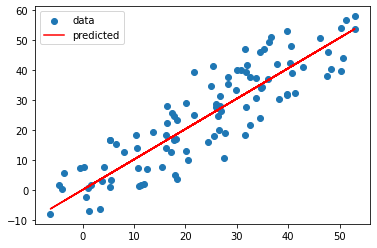

In [9]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, predict(X), 'r-', label='predicted')
plt.legend()